### Importando as biblio e informando parâmetros de plotagem

In [112]:
import pandas as pd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from folium.plugins import HeatMap


plt.style.use("seaborn-muted")
sns.set_style('darkgrid')
pd.set_option('display.max_columns', 50)
pd.set_option('display.max_rows', 200)
pd.set_option('display.float_format', lambda x: '%.5f' % x)

%matplotlib inline

df =  pd.read_csv("kc_house_data.csv", parse_dates=['date', 'yr_built']) #dando parse nas variáveis de data
df.head(10)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,2014-10-13,221900.00000,3,1.00000,1180,5650,1.00000,0,0,3,7,1180,0,1955-01-01,0,98178,47.51120,-122.25700,1340,5650
1,6414100192,2014-12-09,538000.00000,3,2.25000,2570,7242,2.00000,0,0,3,7,2170,400,1951-01-01,1991,98125,47.72100,-122.31900,1690,7639
2,5631500400,2015-02-25,180000.00000,2,1.00000,770,10000,1.00000,0,0,3,6,770,0,1933-01-01,0,98028,47.73790,-122.23300,2720,8062
3,2487200875,2014-12-09,604000.00000,4,3.00000,1960,5000,1.00000,0,0,5,7,1050,910,1965-01-01,0,98136,47.52080,-122.39300,1360,5000
4,1954400510,2015-02-18,510000.00000,3,2.00000,1680,8080,1.00000,0,0,3,8,1680,0,1987-01-01,0,98074,47.61680,-122.04500,1800,7503
5,7237550310,2014-05-12,1225000.00000,4,4.50000,5420,101930,1.00000,0,0,3,11,3890,1530,2001-01-01,0,98053,47.65610,-122.00500,4760,101930
6,1321400060,2014-06-27,257500.00000,3,2.25000,1715,6819,2.00000,0,0,3,7,1715,0,1995-01-01,0,98003,47.30970,-122.32700,2238,6819
7,2008000270,2015-01-15,291850.00000,3,1.50000,1060,9711,1.00000,0,0,3,7,1060,0,1963-01-01,0,98198,47.40950,-122.31500,1650,9711
8,2414600126,2015-04-15,229500.00000,3,1.00000,1780,7470,1.00000,0,0,3,7,1050,730,1960-01-01,0,98146,47.51230,-122.33700,1780,8113
9,3793500160,2015-03-12,323000.00000,3,2.50000,1890,6560,2.00000,0,0,3,7,1890,0,2003-01-01,0,98038,47.36840,-122.03100,2390,7570


In [113]:
#Investigar o tamanho do df
print('Dimensão dos dados')
print('Linhas:',df.shape[0])
print('Colunas:',df.shape[1])

Dimensão dos dados
Linhas: 21613
Colunas: 21


In [114]:
df.info() #muitas variáveis de tipos diferentes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             21613 non-null  int64         
 1   date           21613 non-null  datetime64[ns]
 2   price          21613 non-null  float64       
 3   bedrooms       21613 non-null  int64         
 4   bathrooms      21613 non-null  float64       
 5   sqft_living    21613 non-null  int64         
 6   sqft_lot       21613 non-null  int64         
 7   floors         21613 non-null  float64       
 8   waterfront     21613 non-null  int64         
 9   view           21613 non-null  int64         
 10  condition      21613 non-null  int64         
 11  grade          21613 non-null  int64         
 12  sqft_above     21613 non-null  int64         
 13  sqft_basement  21613 non-null  int64         
 14  yr_built       21613 non-null  datetime64[ns]
 15  yr_renovated   2161

In [115]:
df = df.assign(year_built=df.yr_built.dt.year)
df.drop('yr_built', 1, inplace=True)


#dt = datetime
#assign() method assign new columns to a DataFrame, returning a new object (a copy) with the new columns added to the original ones. 
#Peguei apenas as informações dos anos de construção e coloquei em uma nova coluna, depois exclui a coluna antiga que também continha dia e mês.

In [116]:
df.head(10)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year_built
0,7129300520,2014-10-13,221900.00000,3,1.00000,1180,5650,1.00000,0,0,3,7,1180,0,0,98178,47.51120,-122.25700,1340,5650,1955
1,6414100192,2014-12-09,538000.00000,3,2.25000,2570,7242,2.00000,0,0,3,7,2170,400,1991,98125,47.72100,-122.31900,1690,7639,1951
2,5631500400,2015-02-25,180000.00000,2,1.00000,770,10000,1.00000,0,0,3,6,770,0,0,98028,47.73790,-122.23300,2720,8062,1933
3,2487200875,2014-12-09,604000.00000,4,3.00000,1960,5000,1.00000,0,0,5,7,1050,910,0,98136,47.52080,-122.39300,1360,5000,1965
4,1954400510,2015-02-18,510000.00000,3,2.00000,1680,8080,1.00000,0,0,3,8,1680,0,0,98074,47.61680,-122.04500,1800,7503,1987
5,7237550310,2014-05-12,1225000.00000,4,4.50000,5420,101930,1.00000,0,0,3,11,3890,1530,0,98053,47.65610,-122.00500,4760,101930,2001
6,1321400060,2014-06-27,257500.00000,3,2.25000,1715,6819,2.00000,0,0,3,7,1715,0,0,98003,47.30970,-122.32700,2238,6819,1995
7,2008000270,2015-01-15,291850.00000,3,1.50000,1060,9711,1.00000,0,0,3,7,1060,0,0,98198,47.40950,-122.31500,1650,9711,1963
8,2414600126,2015-04-15,229500.00000,3,1.00000,1780,7470,1.00000,0,0,3,7,1050,730,0,98146,47.51230,-122.33700,1780,8113,1960
9,3793500160,2015-03-12,323000.00000,3,2.50000,1890,6560,2.00000,0,0,3,7,1890,0,0,98038,47.36840,-122.03100,2390,7570,2003


### Avaliar breve estatística de uma variável

In [117]:
pd.DataFrame(df['price'].describe()) #muita variação de valores

,price
count,21613.00000
mean,540088.14177
std,367127.19648
min,75000.00000
25%,321950.00000
50%,450000.00000
75%,645000.00000
max,7700000.00000


C:\Users\lucas\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


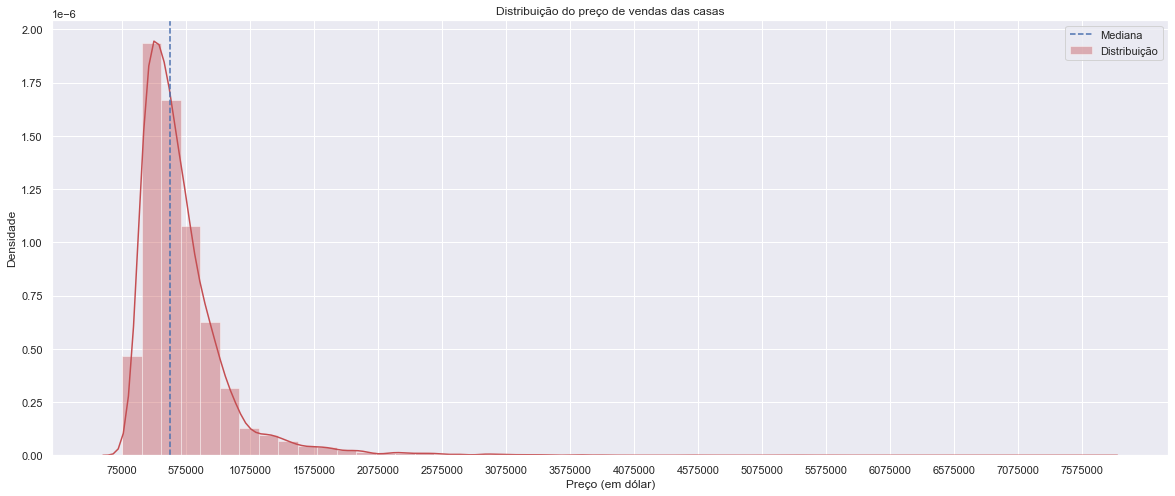

In [118]:
med_price = df['price'].median()

plt.figure(figsize=[20, 8])
sns.distplot(df['price'], color = 'r', label = 'Distribuição') 
plt.axvline(med_price, color='b', linestyle='dashed', label='Mediana') #mediana tracejada
plt.title('Distribuição do preço de vendas das casas')
plt.xlabel('Preço (em dólar)')
plt.ylabel('Densidade')
plt.ticklabel_format(style='plain', axis='x') #plain turns off scientific notation
plt.xticks(np.arange(df['price'].min(), df['price'].max(), step=500000)) #cria um arranjo contendo uma seqüência de valores espaçados de maneira uniforme

plt.legend()
plt.show()

In [119]:
df.isnull().sum().sort_values(ascending=False) #importante verificar se há dados nulos para limpeza

id               0
grade            0
sqft_lot15       0
sqft_living15    0
long             0
lat              0
zipcode          0
yr_renovated     0
sqft_basement    0
sqft_above       0
condition        0
date             0
view             0
waterfront       0
floors           0
sqft_lot         0
sqft_living      0
bathrooms        0
bedrooms         0
price            0
year_built       0
dtype: int64

### Análise de gráficos

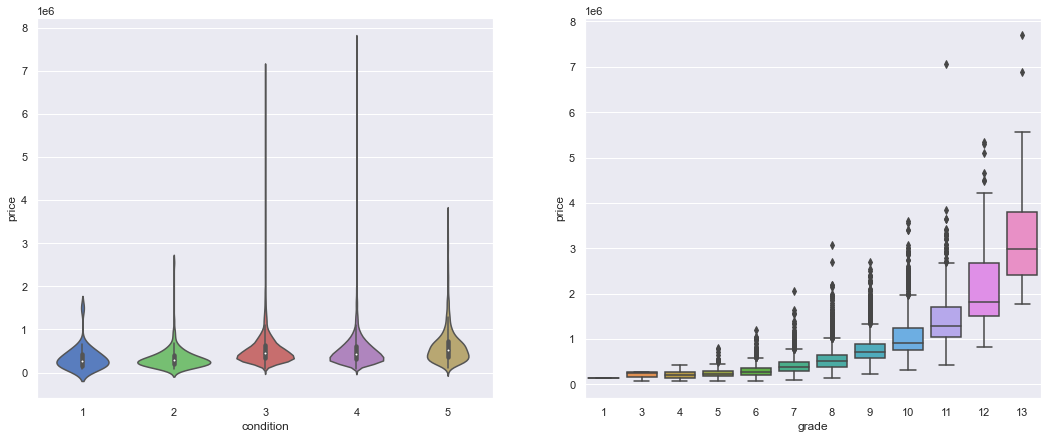

In [120]:
plt.figure(figsize=[18, 7])

plt.subplot(121)
sns.violinplot(x='condition', y='price', data=df);

plt.subplot(122)
sns.boxplot(x='grade', y='price', data=df);

plt.show()

#A variável "grade" parece influenciar de maneira positiva o preço das casas. 
#Há diversos outliers, porém a mediana do preço aumenta quanto melhor a qualidade dos materiais.

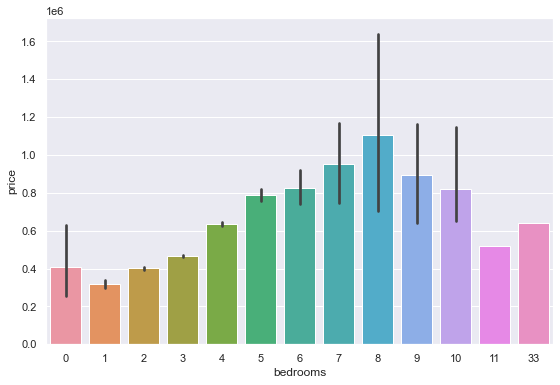

In [121]:
plt.figure(figsize=[20, 6])

plt.subplot(122)
sns.barplot(x='bedrooms', y='price', data=df)
plt.show()
# Já a quantidade de quartos não apresenta muita correçação com preço acima de 8

In [122]:
pd.DataFrame(df['condition'].value_counts().sort_index())

#Há poucas casas em condições ruins (1, 2), uma quantidade elevada de casas em condição média (3), 
#uma quantidade considerável em condições boas (4) e uma quantidade menor de casas em condições ótimas (5).

,condition
1,30
2,172
3,14031
4,5679
5,1701


In [123]:
pd.DataFrame(df['grade'].value_counts().sort_index())

# A quantidade de casas de qualidade vai aumentando até 7, depois baixando

,grade
1,1
3,3
4,29
5,242
6,2038
7,8981
8,6068
9,2615
10,1134
11,399


### Pequena Limpeza

In [124]:
var_num = df._get_numeric_data()
var_num.drop('id', 1, inplace=True) #tirar a coluna id
var_num.drop('view', 1, inplace=True)
var_num.drop('waterfront', 1, inplace=True)
var_num.head() 

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,sqft_above,sqft_basement,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year_built
0,221900.00000,3,1.00000,1180,5650,1.00000,3,7,1180,0,0,98178,47.51120,-122.25700,1340,5650,1955
1,538000.00000,3,2.25000,2570,7242,2.00000,3,7,2170,400,1991,98125,47.72100,-122.31900,1690,7639,1951
2,180000.00000,2,1.00000,770,10000,1.00000,3,6,770,0,0,98028,47.73790,-122.23300,2720,8062,1933
3,604000.00000,4,3.00000,1960,5000,1.00000,5,7,1050,910,0,98136,47.52080,-122.39300,1360,5000,1965
4,510000.00000,3,2.00000,1680,8080,1.00000,3,8,1680,0,0,98074,47.61680,-122.04500,1800,7503,1987


In [125]:
#outra forma de limpar o df selecionando apenas o que quero

new_df = df[['price','grade','sqft_above',
       "sqft_living","sqft_living15","bathrooms"]]
new_df.head(10)

,price,grade,sqft_above,sqft_living,sqft_living15,bathrooms
0,221900.00000,7,1180,1180,1340,1.00000
1,538000.00000,7,2170,2570,1690,2.25000
2,180000.00000,6,770,770,2720,1.00000
3,604000.00000,7,1050,1960,1360,3.00000
4,510000.00000,8,1680,1680,1800,2.00000
5,1225000.00000,11,3890,5420,4760,4.50000
6,257500.00000,7,1715,1715,2238,2.25000
7,291850.00000,7,1060,1060,1650,1.50000
8,229500.00000,7,1050,1780,1780,1.00000
9,323000.00000,7,1890,1890,2390,2.50000


### Procurar correlação entre as variáveis

In [126]:
var_num.corr()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,sqft_above,sqft_basement,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year_built
price,1.00000,0.30835,0.52514,0.70204,0.08966,0.25679,0.03636,0.66743,0.60557,0.32382,0.12643,-0.05320,0.30700,0.02163,0.58538,0.08245,0.05401
bedrooms,0.30835,1.00000,0.51588,0.57667,0.03170,0.17543,0.02847,0.35697,0.47760,0.30309,0.01884,-0.15267,-0.00893,0.12947,0.39164,0.02924,0.15418
bathrooms,0.52514,0.51588,1.00000,0.75467,0.08774,0.50065,-0.12498,0.66498,0.68534,0.28377,0.05074,-0.20387,0.02457,0.22304,0.56863,0.08718,0.50602
sqft_living,0.70204,0.57667,0.75467,1.00000,0.17283,0.35395,-0.05875,0.76270,0.87660,0.43504,0.05536,-0.19943,0.05253,0.24022,0.75642,0.18329,0.31805
sqft_lot,0.08966,0.03170,0.08774,0.17283,1.00000,-0.00520,-0.00896,0.11362,0.18351,0.01529,0.00764,-0.12957,-0.08568,0.22952,0.14461,0.71856,0.05308
floors,0.25679,0.17543,0.50065,0.35395,-0.00520,1.00000,-0.26377,0.45818,0.52388,-0.24570,0.00634,-0.05912,0.04961,0.12542,0.27989,-0.01127,0.48932
condition,0.03636,0.02847,-0.12498,-0.05875,-0.00896,-0.26377,1.00000,-0.14467,-0.15821,0.17410,-0.06062,0.00303,-0.01494,-0.10650,-0.09282,-0.00341,-0.36142
grade,0.66743,0.35697,0.66498,0.76270,0.11362,0.45818,-0.14467,1.00000,0.75592,0.16839,0.01441,-0.18486,0.11408,0.19837,0.71320,0.11925,0.44696
sqft_above,0.60557,0.47760,0.68534,0.87660,0.18351,0.52388,-0.15821,0.75592,1.00000,-0.05194,0.02328,-0.26119,-0.00082,0.34380,0.73187,0.19405,0.42390
sqft_basement,0.32382,0.30309,0.28377,0.43504,0.01529,-0.24570,0.17410,0.16839,-0.05194,1.00000,0.07132,0.07484,0.11054,-0.14476,0.20035,0.01728,-0.13312


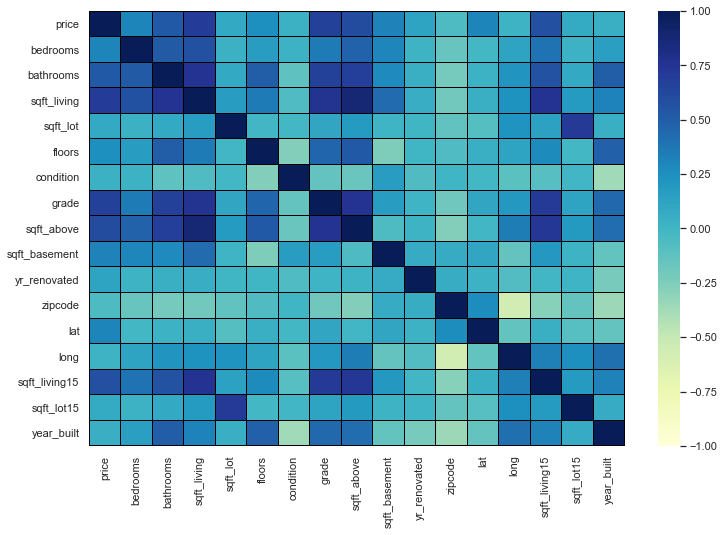

In [127]:
var_num_corr = var_num.corr()

plt.figure(figsize = [12, 8])
sns.heatmap(var_num_corr, vmin=-1, vmax=1, linewidth=0.01, linecolor='black', cmap='YlGnBu') #chama seaborn
plt.show()

# Muitas colunas sem correlação, esse plot é interessante para filtrarmos as melhores correlações em relação ao preço

In [128]:
var_num_corr['price'].sort_values(ascending=False).round(3)
# Fazendo a correlação das outras variáveis em relação ao preço e rankeando


price            1.00000
sqft_living      0.70200
grade            0.66700
sqft_above       0.60600
sqft_living15    0.58500
bathrooms        0.52500
sqft_basement    0.32400
bedrooms         0.30800
lat              0.30700
floors           0.25700
yr_renovated     0.12600
sqft_lot         0.09000
sqft_lot15       0.08200
year_built       0.05400
condition        0.03600
long             0.02200
zipcode         -0.05300
Name: price, dtype: float64

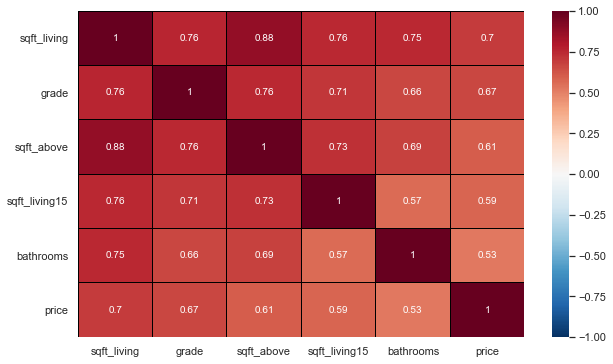

In [129]:
new_df = df[['sqft_living', 'grade', 'sqft_above',
       'sqft_living15', 'bathrooms','price']]              #selecionando os top5
most_corr_var = new_df.corr()                      #faz novamente a correlação

plt.figure(figsize=[10, 6])
sns.heatmap(data=most_corr_var, vmin=-1, vmax=1, linewidth=0.01, linecolor='black', cmap='RdBu_r', annot=True)
#annot=True (If True, write the data value in each cell)

plt.show()

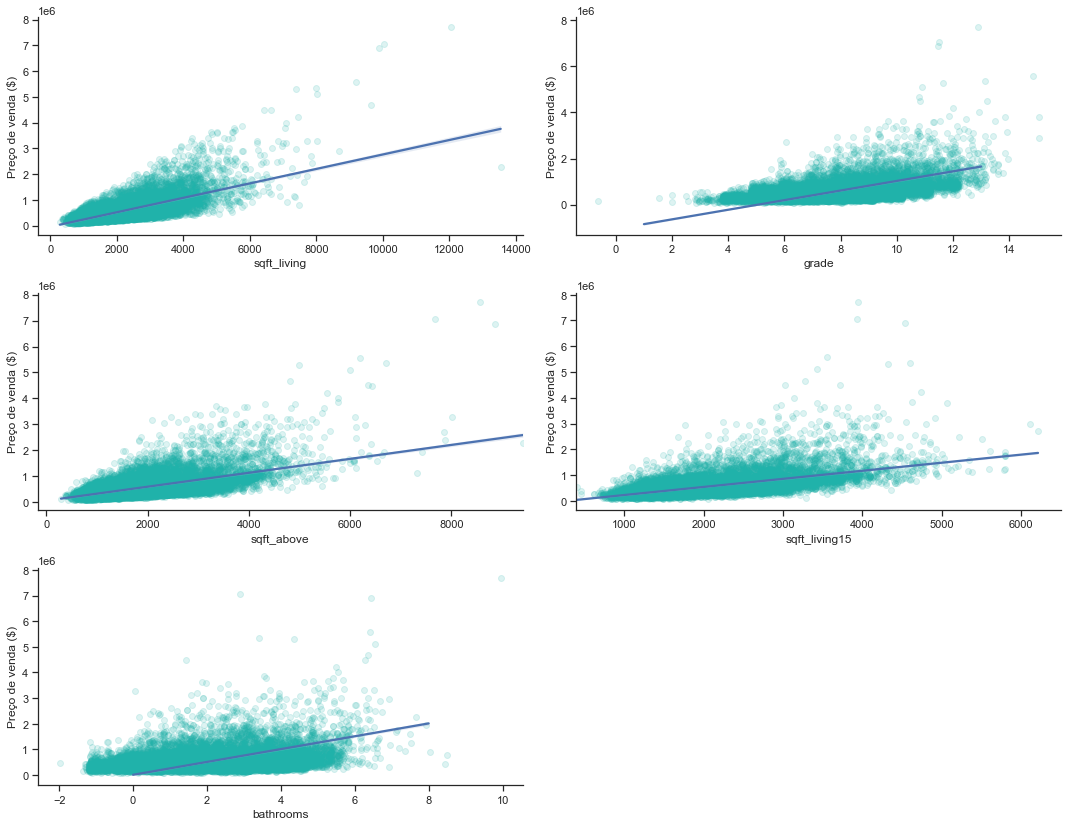

In [130]:
# Save a palette to a variable:

plt.figure(figsize=[15, 15])
custom_params = {"axes.spines.right": False, "axes.spines.top": False}
sns.set_theme(style="ticks", rc=custom_params)

i = 1

for col in new_df:
    if col == 'price':
        continue
    plt.subplot(4, 2, i)
    sns.regplot(x=new_df[col], y=new_df['price'], line_kws={'color': 'b'},#plot with specifying the x, y parameters
               color="lightseagreen", x_jitter=2.2, scatter_kws={'alpha':0.15})
    plt.xlabel(col)
    plt.ylabel('Preço de venda ($)')
    i+=1
    
plt.tight_layout()
plt.show()

O número de banheiros tem influência positiva direta no preço das residências, apesar de haver muita dispersão dos dados a partir de 5 banheiros. 

E de novo é possível notar que esse número de banheiros possui números float, o que é algo estranho. Provavelmente um erro na hora da coleta dos dados; sqft_living também possui influência direta, apesar da grande dispersão a partir 7000;

Como já visto, "grade" também tem influência positiva; sqft_above e sqft_living15 possuem influência positiva, apesar da ambos possuirem dispersão a partir de 5000;

### Analisando a tabela yr_build

In [131]:
dates = pd.DataFrame(df['year_built'], columns=['year_built'])
bins = [1900, 1910, 1920, 1930, 1940, 1950, 1960, 1970, 1980, 1990, 2000, 2010, 2015]
labels = ['1900 - 1910', '1911 - 1920', '1921 - 1930', '1931 - 1940', '1941 - 1950', '1951 - 1960', '1961 - 1970', '1971 - 1980',
         '1981 - 1990', '1991 - 2000', '2001 - 2010', '2011 - 2015']
df['decade_built'] = pd.cut(dates['year_built'], bins, labels = labels, include_lowest = True)
df.sample(5)

#Separando os anos de construção em décadas e criando uma nova coluna

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year_built,decade_built
1340,9477100060,2014-09-09,445950.00000,3,1.75000,1300,7800,1.00000,0,0,5,7,1300,0,0,98034,47.73210,-122.19500,1520,7344,1968,1961 - 1970
8934,106000044,2014-08-26,399950.00000,3,1.00000,1470,7930,1.00000,0,0,3,7,1070,400,0,98177,47.70130,-122.36800,1440,8100,1950,1941 - 1950
2275,6918700370,2014-10-27,610000.00000,4,2.25000,1660,7350,1.00000,0,0,3,8,1660,0,2014,98008,47.62630,-122.12400,1790,7455,1965,1961 - 1970
11566,9567800140,2015-03-25,310000.00000,3,1.00000,1240,7194,1.00000,0,0,3,6,1090,150,0,98011,47.76360,-122.20200,2090,8514,1936,1931 - 1940
17536,3356402232,2014-09-24,179900.00000,3,1.75000,1230,12000,1.00000,0,0,3,6,1230,0,0,98001,47.28780,-122.25100,1550,12000,1970,1961 - 1970


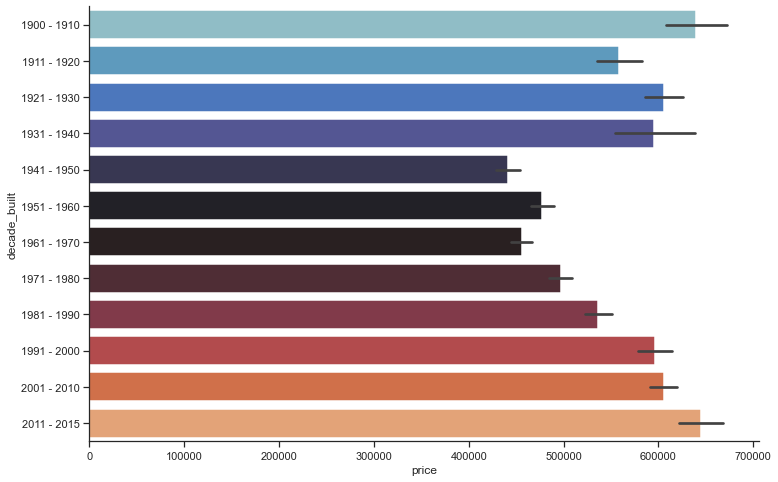

In [132]:
plt.figure(figsize=[12, 8])

sns.barplot(x=df['price'], y=df['decade_built'], palette="icefire",linewidth=1.5)

plt.show()

#Após uma variação de altos e baixos entre os anos de 1900 e 1960, o preço das casas voltou a subir a partir do ano de 1961.

In [133]:
prices = pd.DataFrame(new_df['price'], columns=['price'])
bins = [0, 250000, 500000, 1000000, 8000000]
labels = ['Group 1', 'Group 2', 'Group 3', 'Group 4']
new_df['price group'] = pd.cut(prices['price'], bins, labels = labels, include_lowest = True)
new_df.head(10)


<ipython-input-133-5300b695f866>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['price group'] = pd.cut(prices['price'], bins, labels = labels, include_lowest = True)


,sqft_living,grade,sqft_above,sqft_living15,bathrooms,price,price group
0,1180,7,1180,1340,1.00000,221900.00000,Group 1
1,2570,7,2170,1690,2.25000,538000.00000,Group 3
2,770,6,770,2720,1.00000,180000.00000,Group 1
3,1960,7,1050,1360,3.00000,604000.00000,Group 3
4,1680,8,1680,1800,2.00000,510000.00000,Group 3
5,5420,11,3890,4760,4.50000,1225000.00000,Group 4
6,1715,7,1715,2238,2.25000,257500.00000,Group 2
7,1060,7,1060,1650,1.50000,291850.00000,Group 2
8,1780,7,1050,1780,1.00000,229500.00000,Group 1
9,1890,7,1890,2390,2.50000,323000.00000,Group 2


Group 1: de 0 a 250000 dólares
Group 2: de 250001 a 500000 dólares
Group 3: de 500001 a 1000000 dólares
Group 4: acima de 1000001 dólares

In [134]:
df.groupby('price group')['price group'].count() #verificar erro

KeyError: 'price group'

### Verificar se a casa foi renovada

In [135]:
df = df.assign(renovated=(df['yr_renovated'] > 0).astype(int))
df.head(10)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year_built,decade_built,renovated
0,7129300520,2014-10-13,221900.00000,3,1.00000,1180,5650,1.00000,0,0,3,7,1180,0,0,98178,47.51120,-122.25700,1340,5650,1955,1951 - 1960,0
1,6414100192,2014-12-09,538000.00000,3,2.25000,2570,7242,2.00000,0,0,3,7,2170,400,1991,98125,47.72100,-122.31900,1690,7639,1951,1951 - 1960,1
2,5631500400,2015-02-25,180000.00000,2,1.00000,770,10000,1.00000,0,0,3,6,770,0,0,98028,47.73790,-122.23300,2720,8062,1933,1931 - 1940,0
3,2487200875,2014-12-09,604000.00000,4,3.00000,1960,5000,1.00000,0,0,5,7,1050,910,0,98136,47.52080,-122.39300,1360,5000,1965,1961 - 1970,0
4,1954400510,2015-02-18,510000.00000,3,2.00000,1680,8080,1.00000,0,0,3,8,1680,0,0,98074,47.61680,-122.04500,1800,7503,1987,1981 - 1990,0
5,7237550310,2014-05-12,1225000.00000,4,4.50000,5420,101930,1.00000,0,0,3,11,3890,1530,0,98053,47.65610,-122.00500,4760,101930,2001,2001 - 2010,0
6,1321400060,2014-06-27,257500.00000,3,2.25000,1715,6819,2.00000,0,0,3,7,1715,0,0,98003,47.30970,-122.32700,2238,6819,1995,1991 - 2000,0
7,2008000270,2015-01-15,291850.00000,3,1.50000,1060,9711,1.00000,0,0,3,7,1060,0,0,98198,47.40950,-122.31500,1650,9711,1963,1961 - 1970,0
8,2414600126,2015-04-15,229500.00000,3,1.00000,1780,7470,1.00000,0,0,3,7,1050,730,0,98146,47.51230,-122.33700,1780,8113,1960,1951 - 1960,0
9,3793500160,2015-03-12,323000.00000,3,2.50000,1890,6560,2.00000,0,0,3,7,1890,0,0,98038,47.36840,-122.03100,2390,7570,2003,2001 - 2010,0


In [136]:
renovated = df.groupby('renovated')['price'].count()
renovated

renovated
0    20699
1      914
Name: price, dtype: int64

In [137]:
renovated_median = df.groupby('renovated')['price'].median()
renovated_median

renovated
0   448000.00000
1   600000.00000
Name: price, dtype: float64

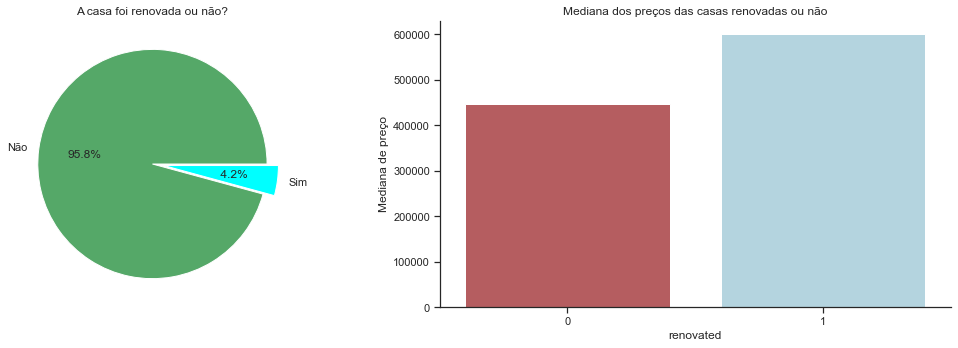

In [138]:
plt.figure(figsize=(15, 5))
        
plt.subplot(1, 2, 1)
plt.pie(renovated, explode = (0, 0.1), colors=['g', 'cyan'], labels= ['Não', 'Sim'], autopct='%4.1f%%')
plt.title('A casa foi renovada ou não?')

plt.subplot(1, 2, 2)
sns.barplot(x=renovated.index, y = renovated_median, palette=['r', 'lightblue'])
plt.title('Mediana dos preços das casas renovadas ou não')
plt.ylabel('Mediana de preço')

plt.tight_layout()
plt.show()

Casas renovadas tem maior preço;
Poucas casas foram renovadas.

### Implementando Regressão Linear para prever R²

O R-quadrado é uma medida estatística de quão próximos os dados estão da linha de regressão ajustada.

PRINCIPAIS LIMITAÇÕES DO R-QUADRADO
O R-quadrado não pode determinar se as estimativas e predições dos coeficientes são tendenciosas, e é por isso que você deve avaliar os gráficos de resíduos.

O R-quadrado não indica se um modelo de regressão é adequado. É possível ter um valor baixo de R-quadrado para um bom modelo ou um valor alto de R-quadrado para um modelo que não se encaixa nos dados!

In [139]:
import sklearn as sk
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

Ajustar um modelo de regressão linear usando a variável longitude 'long' e calcular o R².

In [140]:
X = df[['long']]
Y = df['price']
lm = LinearRegression()
lm
lm.fit(X,Y)
lm.score(X, Y)

0.00046769430149007363

Ajustar um modelo de regressão linear usando a variável longitude 'sqft_living' e calcular o R².

In [141]:
U = df[['sqft_living']]
V = df['price']
lm.fit(U,V)
lm.score(U,V)

0.4928532179037931

Ajustar um modelo de regressão linear usando uma lista de variáveis

In [142]:
features =["floors", "waterfront","lat" ,"bedrooms" ,"sqft_basement" ,"view" ,"bathrooms","sqft_living15","sqft_above","grade","sqft_living"]     
X = df[features]
Y = df['price']
lm.fit(X,Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)
lm.score(X,Y)

0.6577151058279325

### Avaliação e Refinamento do Modelo

In [143]:
df.drop(['id' ,'date','zipcode','long','condition','year_built','decade_built'], axis=1, inplace=True)

df['price'] = df['price'] / df['price'].max()
df['bedrooms'] = df['bedrooms'] / df['bedrooms'].max()
df['bathrooms'] = df['bathrooms'] / df['bathrooms'].max()
df['sqft_living'] = df['sqft_living'] / df['sqft_living'].max()
df['sqft_lot'] = df['sqft_lot'] / df['sqft_lot'].max()
df['floors'] = df['floors'] / df['floors'].max()
df['waterfront'] = df['waterfront'] / df['waterfront'].max()
df['view'] = df['view'] / df['view'].max()
df['grade'] = df['grade'] / df['grade'].max()
df['sqft_above'] = df['sqft_above'] / df['sqft_above'].max()
df['sqft_basement'] = df['sqft_basement'] / df['sqft_basement'].max()
df['yr_renovated'] = df['yr_renovated'] / df['yr_renovated'].max()
df['lat'] = df['lat'] / df['lat'].max()
df['sqft_living15'] = df['sqft_living15'] / df['sqft_living15'].max()
df['sqft_lot15'] = df['sqft_lot15'] / df['sqft_lot15'].max()

df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,grade,sqft_above,sqft_basement,yr_renovated,lat,sqft_living15,sqft_lot15,renovated
0,0.02882,0.09091,0.12500,0.08715,0.00342,0.28571,0.00000,0.00000,0.53846,0.12540,0.00000,0.00000,0.99442,0.21578,0.00649,0
1,0.06987,0.09091,0.28125,0.18981,0.00439,0.57143,0.00000,0.00000,0.53846,0.23061,0.08299,0.98809,0.99882,0.27214,0.00877,1
2,0.02338,0.06061,0.12500,0.05687,0.00606,0.28571,0.00000,0.00000,0.46154,0.08183,0.00000,0.00000,0.99917,0.43800,0.00925,0
3,0.07844,0.12121,0.37500,0.14476,0.00303,0.28571,0.00000,0.00000,0.53846,0.11158,0.18880,0.00000,0.99463,0.21900,0.00574,0
4,0.06623,0.09091,0.25000,0.12408,0.00489,0.28571,0.00000,0.00000,0.61538,0.17853,0.00000,0.00000,0.99663,0.28986,0.00861,0


#from sklearn.preprocessing import MinMaxScaler
#scaler = MinMaxScaler()
#df = scaler.fit_transform(df)

### Regressão Linear c todo df

In [146]:
X = df.drop('price', axis=1)
Y = df['price'] #Tirando nossa classe de interesse do df e transferindo pro eixo Y
lm.fit(X,Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)
lm.score(X,Y)

0.6633846131660757

### Teste/Treino

In [108]:
#Splitted Data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=44, shuffle =True)

print("number of test samples:", X_test.shape[0])
print("number of training samples:",X_train.shape[0])

#X= todo meu conjunto c exceçao da classe
#y= a classe (price)

number of test samples: 7133
number of training samples: 14480


### Modelo de regressão de Ridge

In [109]:
from sklearn.linear_model import Ridge

RidgeModel = Ridge(alpha = 0.1)
RidgeModel.fit(X_train, y_train)
print("The predicted values are : " + str(RidgeModel.predict(X_test)))

print("\nThe R^2 Score value is mentioned as : " + str(RidgeModel.score(X_test, y_test)))

The predicted values are : [0.05122976 0.05334605 0.05406578 ... 0.03066274 0.05512876 0.06664502]

The R^2 Score value is mentioned as : 0.6416574473478416


### Modelo de regressão de Aumento de Gradiente

In [104]:
#Applying Gradient Boosting Regressor Model 
from sklearn.ensemble import GradientBoostingRegressor

GBRModel = GradientBoostingRegressor(n_estimators=100,max_depth=2,learning_rate = 1.5 ,random_state=33)
GBRModel.fit(X_train, y_train)

print('GBRModel Train Score is : ' , GBRModel.score(X_train, y_train))
print('GBRModel Test Score is : ' , GBRModel.score(X_test, y_test))
print('----------------------------------------------------')

#Calculating Prediction
y_pred = GBRModel.predict(X_test)
print('Predicted Value for GBRModel is : ' , y_pred[:10])

from sklearn.metrics import mean_absolute_error 

#Calculating Mean Absolute Error
MAEValue = mean_absolute_error(y_test, y_pred, multioutput='uniform_average') # it can be raw_values
print('\nMean Absolute Error Value is : ', MAEValue)

GBRModel Train Score is :  0.8588714549595653
GBRModel Test Score is :  0.7287838747247632
----------------------------------------------------
Predicted Value for GBRModel is :  [0.04875986 0.0423386  0.05016721 0.15391285 0.04789589 0.03738703
 0.07961584 0.0730326  0.02855901 0.08596876]

Mean Absolute Error Value is :  0.013846447165705844


### Regressão KNeighbors

In [106]:
from sklearn.neighbors import KNeighborsRegressor

KNeighborsRegressorModel = KNeighborsRegressor(n_neighbors = 5, weights='uniform', #also can be : distance, or defined function 
                                               algorithm = 'auto')    #also can be : ball_tree ,  kd_tree  , brute
KNeighborsRegressorModel.fit(X_train, y_train)

#Calculating Details
print('KNeighborsRegressorModel Train Score is : ' , KNeighborsRegressorModel.score(X_train, y_train))
print('KNeighborsRegressorModel Test Score is : ' , KNeighborsRegressorModel.score(X_test, y_test))
#print('----------------------------------------------------')

#Calculating Prediction
y_pred = KNeighborsRegressorModel.predict(X_test)
print('\nPredicted Value for KNeighborsRegressorModel is : ' , y_pred[:10])

KNeighborsRegressorModel Train Score is :  0.7685932791874861
KNeighborsRegressorModel Test Score is :  0.6269331633333866

Predicted Value for KNeighborsRegressorModel is :  [0.03672725 0.07077922 0.05701299 0.11098571 0.05361818 0.03761039
 0.07470519 0.09974026 0.09711688 0.05098571]
